<a href="https://colab.research.google.com/github/Aryan95614/Pytorch-Lessons/blob/RUNTHISFILE/Pytorch_Tutorial_3_Learn_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is a classification problem?

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:
- Binary classification: **Target can be one of two options, e.g. yes or no**
- Multi-class classification: **Target can be one of more than two options**
- Multi-label classification: **Target can be assigned more than one option**

In [17]:
# Making sure that Pytorch is here Installed
import torch 

print(torch.__version__)

1.13.0+cu116



##1. Architecture of a classification neural network
Before we get into writing code, let's look at the general architecture of a classification neural network.

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th><strong>Hyperparameter</strong></th>
<th><strong>Binary Classification</strong></th>
<th><strong>Multiclass classification</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Input layer shape</strong> (<code>in_features</code>)</td>
<td>Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)</td>
<td>Same as binary classification</td>
</tr>
<tr>
<td><strong>Hidden layer(s)</strong></td>
<td>Problem specific, minimum = 1, maximum = unlimited</td>
<td>Same as binary classification</td>
</tr>
<tr>
<td><strong>Neurons per hidden layer</strong></td>
<td>Problem specific, generally 10 to 512</td>
<td>Same as binary classification</td>
</tr>
<tr>
<td><strong>Output layer shape</strong> (<code>out_features</code>)</td>
<td>1 (one class or the other)</td>
<td>1 per class (e.g. 3 for food, person or dog photo)</td>
</tr>
<tr>
<td><strong>Hidden layer activation</strong></td>
<td>Usually <a href="https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU">ReLU</a> (rectified linear unit) but <a href="https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions">can be many others</a></td>
<td>Same as binary classification</td>
</tr>
<tr>
<td><strong>Output activation</strong></td>
<td><a href="https://en.wikipedia.org/wiki/Sigmoid_function">Sigmoid</a> (<a href="https://pytorch.org/docs/stable/generated/torch.sigmoid.html"><code>torch.sigmoid</code></a> in PyTorch)</td>
<td><a href="https://en.wikipedia.org/wiki/Softmax_function">Softmax</a> (<a href="https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html"><code>torch.softmax</code></a> in PyTorch)</td>
</tr>
<tr>
<td><strong>Loss function</strong></td>
<td><a href="https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression">Binary crossentropy</a> (<a href="https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html"><code>torch.nn.BCELoss</code></a> in PyTorch)</td>
<td>Cross entropy (<a href="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html"><code>torch.nn.CrossEntropyLoss</code></a> in PyTorch)</td>
</tr>
<tr>
<td><strong>Optimizer</strong></td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.optim.SGD.html">SGD</a> (stochastic gradient descent), <a href="https://pytorch.org/docs/stable/generated/torch.optim.Adam.html">Adam</a> (see <a href="https://pytorch.org/docs/stable/optim.html"><code>torch.optim</code></a> for more options)</td>
<td>Same as binary classification</td>
</tr>
</tbody>
</table></div></div>

##2. Make classification data and get it ready
Let's begin by making some data.

We'll use the make_circles() method from Scikit-Learn to generate two circles with different coloured dots.

In [18]:
from sklearn.datasets import make_circles

n_samples = 1000 # Make 1000 samples in **numpy arrays**

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]



Looks like there's two X values per one y value.

Let's keep following the data explorer's motto of visualize, visualize, visualize and put them into a pandas DataFrame.

In [19]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0



It looks like each pair of X features (X1 and X2) has a label (y) value of either 0 or 1.

This tells us that our problem is binary classification since there's only two options (0 or 1).

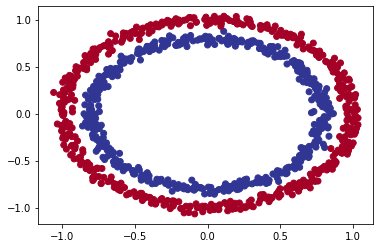

In [20]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations with result in errors in your models.

We're going to see plenty of these throughout the course.

And there's no surefire way to making sure they won't happen, they will.

What you can do instead is continaully familiarize yourself with the shape of the data you're working with.

I like referring to it as input and output shapes.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs?"

Let's find out.

In [21]:

X.shape, y.shape # ((1000, 2), (1000,))

((1000, 2), (1000,))

This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

We have two inputs for one output.

1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:

- Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
- Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [22]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function train_test_split() from Scikit-Learn.

We'll use test_size=0.2 (80% training, 20% testing) and because the split happens randomly across the data, let's use random_state=42 so the split is reproducible.

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


800
200
800
200


##3. Building a model
We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
Constructing a model by subclassing nn.Module.
Defining a loss function and optimizer.
Creating a training loop (this'll be in the next section).
The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and torch.nn as well as setting up device agnostic code.

In [24]:
from torch import nn

In other words, given X (features) we want our model to predict y (label).

This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of X and y.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:

- Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
- Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
- Defines a forward() method containing the forward pass computation of the model.
- Instantiates the model class and sends it to the target device.

In [25]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=5) # takes in 5 features and produces 5 features
        self.layer_3 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 label (y)
    
    # Define a forward method containing the forward pass computation and also override
    def forward(self, x):      
        return self.layer_3(self.layer_2(self.layer_1(x))) 

model_0 = NeuralNetwork().to(device)
print(model_0)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)


What's going on here?

We've seen a few of these steps before.

The only major change is what's happening between self.layer_1 and self.layer_2.

self.layer_1 takes 2 input features in_features=2 and produces 5 output features out_features=5.

This is known as having 5 hidden units or neurons.

This layer turns the input data from having 2 features to 5 features.

Why do this?

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs.

I say potentially because sometimes it doesn't work.

The number of hidden units you can use in neural network layers is a hyperparameter (a value you can set yourself) and there's no set in stone value you have to use.

Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.

Since our dataset is small and simple, we'll keep it small.

The only rule with hidden units is that the next layer, in our case, self.layer_2 has to take the same in_features as the previous layer out_features.

That's why self.layer_2 has in_features=5, it takes the out_features=5 from self.layer_1 and performs a linear computation on them, turning them into out_features=1 (the same shape as y).

---

You can also do the same as above using nn.Sequential.

nn.Sequential performs a forward pass computation of the input data through the layers in the order they appear.

In [26]:
# Replicate Neural Network with nn.Sequential
from collections import OrderedDict

model_0 = nn.Sequential(OrderedDict([ ('fc1', nn.Linear(in_features=2, out_features=5)),
                                    #('act1', nn.ReLU()),
                                    #('fc2', nn.Linear(in_features=5, out_features=5)),
                                    #('act2', nn.Sigmoid()),
                                    ('fc3', nn.Linear(in_features=5, out_features=1)) ]))

print(model_0)

Sequential(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)



Woah, that looks much simpler than subclassing nn.Module, why not just always use nn.Sequential?

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [27]:
# Make predictions with the model
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2437],
        [-0.5748],
        [ 0.3739],
        [-0.4177],
        [-0.0234],
        [-0.2224],
        [-0.8398],
        [-0.7583],
        [ 0.3898],
        [-0.6014]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])



2.1 Setup loss function and optimizer
We've setup a loss (also called a criterion or cost function) and optimizer before in notebook 01.

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, so can too the Adam optimizer (torch.optim.Adam()).

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th>Loss function/Optimizer</th>
<th>Problem type</th>
<th>PyTorch Code</th>
</tr>
</thead>
<tbody>
<tr>
<td>Stochastic Gradient Descent (SGD) optimizer</td>
<td>Classification, regression, many others.</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.optim.SGD.html"><code>torch.optim.SGD()</code></a></td>
</tr>
<tr>
<td>Adam Optimizer</td>
<td>Classification, regression, many others.</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.optim.Adam.html"><code>torch.optim.Adam()</code></a></td>
</tr>
<tr>
<td>Binary cross entropy loss</td>
<td>Binary classification</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html"><code>torch.nn.BCELossWithLogits</code></a> or <a href="https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html"><code>torch.nn.BCELoss</code></a></td>
</tr>
<tr>
<td>Cross entropy loss</td>
<td>Mutli-class classification</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html"><code>torch.nn.CrossEntropyLoss</code></a></td>
</tr>
<tr>
<td>Mean absolute error (MAE) or L1 Loss</td>
<td>Regression</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html"><code>torch.nn.L1Loss</code></a></td>
</tr>
<tr>
<td>Mean squared error (MSE) or L2 Loss</td>
<td>Regression</td>
<td><a href="https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss"><code>torch.nn.MSELoss</code></a></td>
</tr>
</tbody>
</table></div></div>


PyTorch has two binary cross entropy implementations:

torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).
Which one should you use?

The documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer.

So generally, **implementation 2 is a better option.** However for advanced usage, you may want to separate the combination of nn.Sigmoid and torch.nn.BCELoss() but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer.

For the optimizer we'll use torch.optim.SGD() to optimize the model parameters with learning rate 0.1.

In [28]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)


Now let's also create an evaluation metric.

An evaluation metric can be used to offer another perspective on how your model is going.

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.

Of course, you could argue both of these are doing the same thing but evaluation metrics offer a different perspective.

After all, when evaluating your models it's good to look at things from multiple points of view.

There are several evaluation metrics that can be used for classification problems but let's start out with accuracy.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.

In [29]:

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

##3. Train model

Okay, now we've got a loss function and optimizer ready to go, let's train a model.

Do you remember the steps in a PyTorch training loop?

If not, here's a reminder.

Steps in training:
- Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
- Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
- Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
- Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
- Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [30]:

y_logits = model_0(X_test.to(device))[:5]
print(torch.sigmoid(y_logits))

tensor([[0.4394],
        [0.3601],
        [0.5924],
        [0.3971],
        [0.4942]], grad_fn=<SigmoidBackward0>)


Since our model hasn't been trained, these outputs are basically random.

But what are they?

They're the output of our forward() method.

Which implements two layers of nn.Linear() which internally calls the following equation:

y=x⋅WeightsT+bias
The raw outputs (unmodified) of this equation (y) and in turn, the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (x
 in the equation or X_test in the code), logits.

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

Let's try it out.


Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of prediction probabilities (I usually refer to these as y_pred_probs), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

If y_pred_probs >= 0.5, y=1 (class 1)
If y_pred_probs < 0.5, y=0 (class 0)
To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function.

In [31]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
print(y_pred_probs)

# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([[0.4394],
        [0.3601],
        [0.5924],
        [0.3971],
        [0.4942]], grad_fn=<SigmoidBackward0>)
tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 0.], grad_fn=<SqueezeBackward0>)

To recap, we converted our model's raw outputs (logits) to predicition probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them.

In [32]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.72270, Accuracy: 48.38% | Test loss: 0.70636, Test acc: 53.00%
Epoch: 10 | Loss: 0.71372, Accuracy: 49.12% | Test loss: 0.69954, Test acc: 53.00%
Epoch: 20 | Loss: 0.70857, Accuracy: 49.12% | Test loss: 0.69610, Test acc: 52.50%
Epoch: 30 | Loss: 0.70526, Accuracy: 49.50% | Test loss: 0.69419, Test acc: 52.00%
Epoch: 40 | Loss: 0.70294, Accuracy: 49.25% | Test loss: 0.69304, Test acc: 52.50%
Epoch: 50 | Loss: 0.70122, Accuracy: 49.75% | Test loss: 0.69232, Test acc: 52.50%
Epoch: 60 | Loss: 0.69990, Accuracy: 49.38% | Test loss: 0.69186, Test acc: 52.50%
Epoch: 70 | Loss: 0.69885, Accuracy: 49.75% | Test loss: 0.69156, Test acc: 52.00%
Epoch: 80 | Loss: 0.69799, Accuracy: 50.12% | Test loss: 0.69138, Test acc: 51.50%
Epoch: 90 | Loss: 0.69729, Accuracy: 49.88% | Test loss: 0.69127, Test acc: 51.50%


Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

##4. Make predictions and evaluate the model

From the metrics it looks like our model is random guessing.

How could we investigate this further?

I've got an idea.

The data explorer's motto!

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import plot_predictions() which we wrote in notebook 01 to use later.

In [33]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


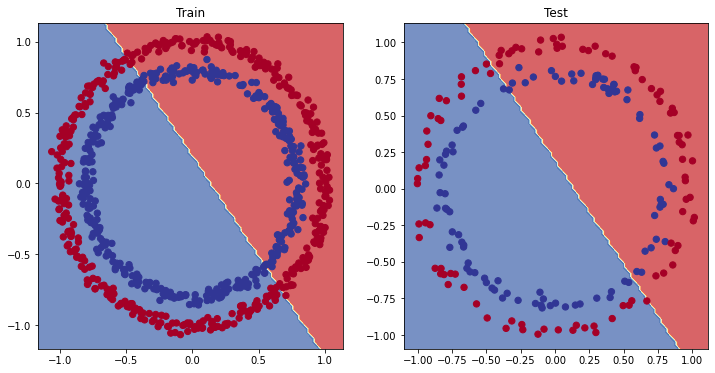

In [34]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

How could we improve this?

##5. Improving a model (from a model perspective)
Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th>Model improvement technique*</th>
<th>What does it do?</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Add more layers</strong></td>
<td>Each layer <em>potentially</em> increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network <em>deeper</em>.</td>
</tr>
<tr>
<td><strong>Add more hidden units</strong></td>
<td>Similar to the above, more hidden units per layer means a <em>potential</em> increase in learning capabilities of the model, more hidden units is often referred to as making your neural network <em>wider</em>.</td>
</tr>
<tr>
<td><strong>Fitting for longer (more epochs)</strong></td>
<td>Your model might learn more if it had more opportunities to look at the data.</td>
</tr>
<tr>
<td><strong>Changing the activation functions</strong></td>
<td>Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint).</td>
</tr>
<tr>
<td><strong>Change the learning rate</strong></td>
<td>Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough.</td>
</tr>
<tr>
<td><strong>Change the loss function</strong></td>
<td>Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem.</td>
</tr>
<tr>
<td><strong>Use transfer learning</strong></td>
<td>Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in <a href="https://www.learnpytorch.io/06_pytorch_transfer_learning/">notebook 06</a>.</td>
</tr>
</tbody>
</table></div></div>

Let's see what happens if we add an extra layer to our model, fit for longer (epochs=1000 instead of epochs=100) and increase the number of hidden units from 5 to 10.

We'll follow the same steps we did above but with a few changed hyperparameters.

In [35]:
class BetterNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=6) # extra layer
        self.layer_4 = nn.Linear(in_features=6, out_features=1)
        
    def forward(self, x): 
        return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

model3 = BetterNeuralNetwork()

Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [36]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

This time we'll train for longer (epochs=1000 vs epochs=100) and see if it improves our model.

In [37]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model3(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70096, Accuracy: 50.00% | Test loss: 0.69874, Test acc: 50.00%
Epoch: 100 | Loss: 0.69374, Accuracy: 50.38% | Test loss: 0.69287, Test acc: 49.00%
Epoch: 200 | Loss: 0.69331, Accuracy: 50.12% | Test loss: 0.69324, Test acc: 48.50%
Epoch: 300 | Loss: 0.69313, Accuracy: 50.12% | Test loss: 0.69359, Test acc: 49.00%
Epoch: 400 | Loss: 0.69305, Accuracy: 50.00% | Test loss: 0.69388, Test acc: 49.00%
Epoch: 500 | Loss: 0.69301, Accuracy: 50.88% | Test loss: 0.69411, Test acc: 47.00%
Epoch: 600 | Loss: 0.69299, Accuracy: 51.00% | Test loss: 0.69428, Test acc: 45.50%
Epoch: 700 | Loss: 0.69299, Accuracy: 51.50% | Test loss: 0.69440, Test acc: 46.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69449, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69455, Test acc: 45.50%


What? Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

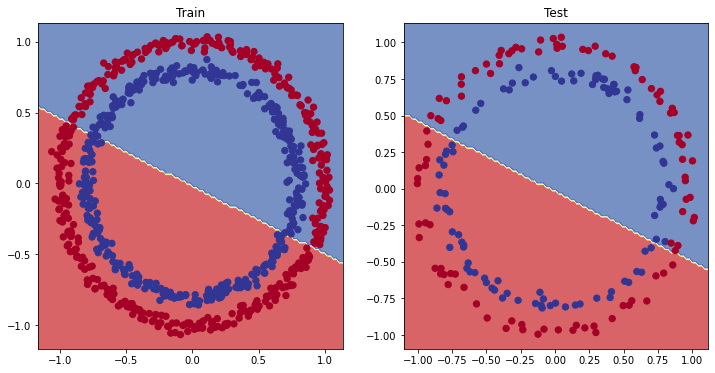

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test)


##6. The missing piece: non-linearity
We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

How?

First, let's recreate the data to start off fresh. We'll use the same setup as before.

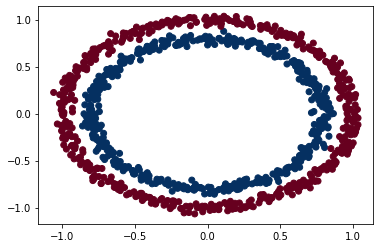

In [39]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


Nice! Now let's split it into training and test sets using 80% of the data for training and 20% for testing.

In [40]:


# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

print(X_train[:5])
print(y_train[:5])

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])
tensor([1., 0., 0., 0., 1.])


Now here comes the fun part.

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?

I bet you could get pretty creative.

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

What do you think will happen when we introduce the capability for our model to use non-linear actviation functions?

Well let's see.

PyTorch has a bunch of ready-made non-linear activation functions that do similiar but different things.

One of the most common and best performing is ReLU (rectified linear-unit, torch.nn.ReLU()).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [41]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


Now we've got a model ready to go, let's create a binary classification loss function as well as an optimizer.

In [42]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [43]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train, y_train
X_test, y_test = X_test, y_test
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc
for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


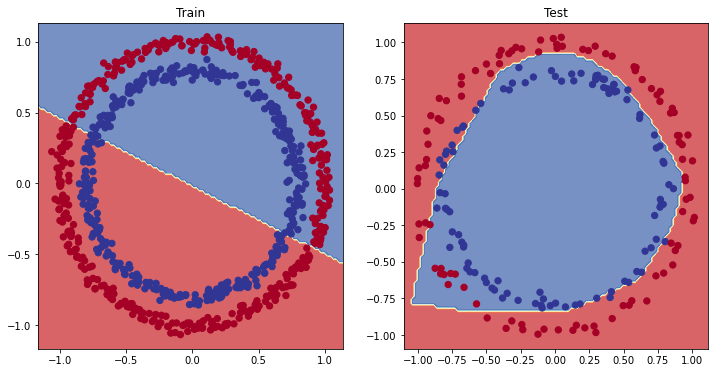

In [44]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

##7. Replicating non-linear activation functions

We saw before how adding non-linear activation functions to our model can helped it to model non-linear data.

 Much of the data you'll encounter in the wild is non-linear (or a combination of linear and non-linear). Right now we've been working with dots on a 2D plot. But imagine if you had images of plants you'd like to classify, there's a lot of different plant shapes. Or text from Wikipedia you'd like to summarize, there's lots of different ways words can be put together (linear and non-linear patterns).

 But what does a non-linear activation look like?

How about we replicate some and what they do?

Let's start by creating a small amount of data.

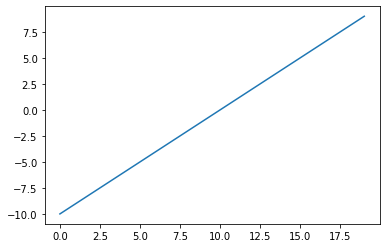

In [45]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
# Visualize the toy tensor
plt.plot(A);

A straight line, nice.

Now let's see how the ReLU activation function influences it.

And instead of using PyTorch's ReLU (torch.nn.ReLU), we'll recreate it ourselves.

The ReLU function turns all negatives to 0 and leaves the positive values as they are.

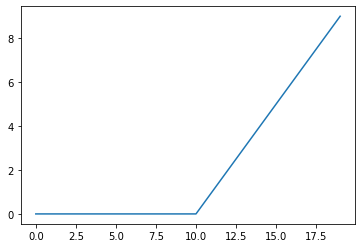

In [46]:
# Create ReLU function by hand 
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

# Plot ReLU activated toy tensor
plt.plot(relu(A));

ice! That looks exactly like the shape of the ReLU function on the Wikipedia page for ReLU).

How about we try the sigmoid function we've been using?

The sigmoid function formula goes like so:

o
u
t
i
=
1/
1
+
e
−
i
n
p
u
t
i
Or using 
x
 as input:

S
(
x
)
=
1/
1
+
e
−
x
i
Where 
S
 stands for sigmoid, 
e
 stands for exponential (torch.exp()) and 
i
 stands for a particular element in a tensor.

Let's build a function to replicate the sigmoid function with PyTorch.

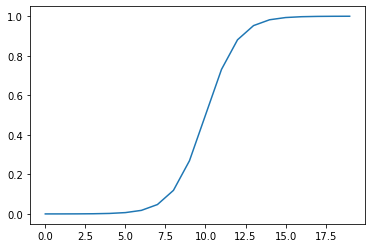

In [47]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));


Looking good! We've gone from a straight line to a curved line.

Now there's plenty more non-linear activation functions that exist in PyTorch that we haven't tried.

But these two are two of the most common.

And the point remains, what patterns could you draw using an unlimited amount of linear (straight) and non-linear (not straight) lines?

Almost anything right?

That's exactly what our model is doing when we combine linear and non-linear functions.

Instead of telling our model what to do, we give it tools to figure out how to best discover patterns in the data.

And those tools are linear and non-linear functions.

##8. Putting things together by building a multi-class PyTorch model

We've covered a fair bit.

But now let's put it all together using a multi-class classification problem.

Recall a binary classification problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a multi-class classification problem deals with classifying something from a list of more than two options (e.g. classifying a photo as a cat a dog or a chicken).

8.1 Creating mutli-class classification data
To begin a multi-class classification problem, let's create some multi-class data.

To do so, we can leverage Scikit-Learn's make_blobs() method. This method will create however many classes (using the centers parameter) we want.

Specifically, let's do the following:

Create some multi-class data with make_blobs().
Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
Split the data into training and test sets using train_test_split().
Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


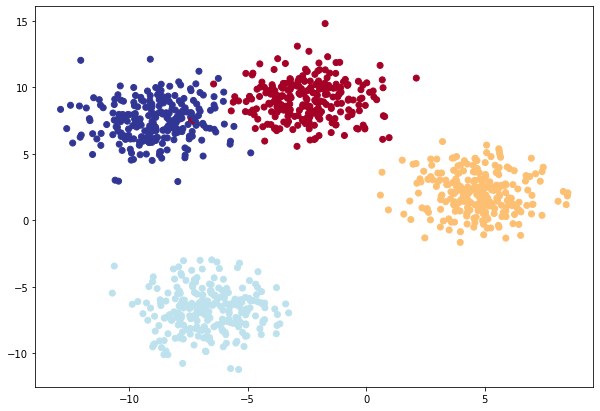

In [48]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

##8.2 Building a multi-class classification model in PyTorch

We've created a few models in PyTorch so far.

You might also be starting to get an idea of how flexible neural networks are.

How about we build one similar to model_3 but this still capable of handling multi-class data?

To do so, let's create a subclass of nn.Module that takes in three hyperparameters:

- input_features - the number of X features coming into the model.
- output_features - the ideal numbers of output features we'd like (this will be equivalent to NUM_CLASSES or the number of classes in your multi-class classification problem).
- hidden_units - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

Then we'll create the model class using the hyperparameters above.

In [49]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [55]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

##8.3 Creating a loss function and optimizer for a multi-class PyTorch model

Since we're working on a multi-class classification problem, we'll use the nn.CrossEntropyLoss() method as our loss function.

And we'll stick with using SGD with a learning rate of 0.1 for optimizing our model_4 parameters.

In [51]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2590, -0.8044, -1.4975, -0.6999],
        [ 0.0923, -1.8560, -0.0268,  1.4529],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [ 0.2839, -0.3683,  0.2465,  0.1701],
        [ 0.2697, -1.5278,  0.1782,  1.3213]], grad_fn=<SliceBackward0>)


Wonderful, our model is predicting one value for each class that we have.

Do you remember what the raw outputs of our model are called?

Hint: it rhymes with "frog splits" (no animals were harmed in the creation of these materials).

If you guessed logits, you'd be correct.

So right now our model is outputing logits but what if we wanted to figure out exactly which label is was giving the sample?

As in, how do we go from logits -> prediction probabilities -> prediction labels just like we did with the binary classification problem?

That's where the softmax activation function comes into play.

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [52]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])
torch.sum(y_pred_probs[0])

tensor([[-1.2464, -0.8990, -1.4913, -0.5871],
        [ 0.8125, -1.6255,  0.7427,  1.9673],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [-0.7877, -0.5911, -0.9520, -0.4658],
        [-0.4386, -1.8562, -0.5667,  1.0392]], grad_fn=<SliceBackward0>)
tensor([[0.1949, 0.2758, 0.1525, 0.3768],
        [0.1926, 0.0168, 0.1796, 0.6111],
        [0.2990, 0.1623, 0.2908, 0.2479],
        [0.2250, 0.2738, 0.1909, 0.3104],
        [0.1537, 0.0372, 0.1352, 0.6738]], grad_fn=<SliceBackward0>)


tensor(1., grad_fn=<SumBackward0>)


You can see the output of torch.argmax() returns 3, so for the features (X) of the sample at index 0, the model is predicting that the most likely class value (y) is 3.

Of course, right now this is just random guessing so it's got a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

Note: To summarize the above, a model's raw output is referred to as logits.

For a multi-class classification problem, to turn the logits into prediction probabilities, you use the softmax activation function (torch.softmax).

The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

##8.5 Creating a training and testing loop for a multi-class PyTorch model

Alright, now we've got all of the preparation steps out of the way, let's write a training and testing loop to improve and evaluation our model.

We've done many of these steps before so much of this will be practice.

The only difference is that we'll be adjusting the steps to turn the model outputs (logits) to prediction probabilities (using the softmax activation function) and then to prediction labels (by taking the argmax of the output of the softmax activation function).

Let's train the model for epochs=100 and evaluate it every 10 epochs.

In [53]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) 
    
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.18218, Acc: 29.50% | Test Loss: 0.92226, Test Acc: 70.00%
Epoch: 10 | Loss: 0.48415, Acc: 96.75% | Test Loss: 0.48694, Test Acc: 97.50%
Epoch: 20 | Loss: 0.33571, Acc: 99.00% | Test Loss: 0.34120, Test Acc: 99.50%
Epoch: 30 | Loss: 0.25764, Acc: 99.00% | Test Loss: 0.25995, Test Acc: 99.50%
Epoch: 40 | Loss: 0.18760, Acc: 99.00% | Test Loss: 0.18233, Test Acc: 99.50%
Epoch: 50 | Loss: 0.10798, Acc: 99.00% | Test Loss: 0.09815, Test Acc: 99.50%
Epoch: 60 | Loss: 0.06487, Acc: 99.12% | Test Loss: 0.05628, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04906, Acc: 99.25% | Test Loss: 0.04078, Test Acc: 99.50%
Epoch: 80 | Loss: 0.04183, Acc: 99.12% | Test Loss: 0.03347, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03775, Acc: 99.12% | Test Loss: 0.02922, Test Acc: 99.50%


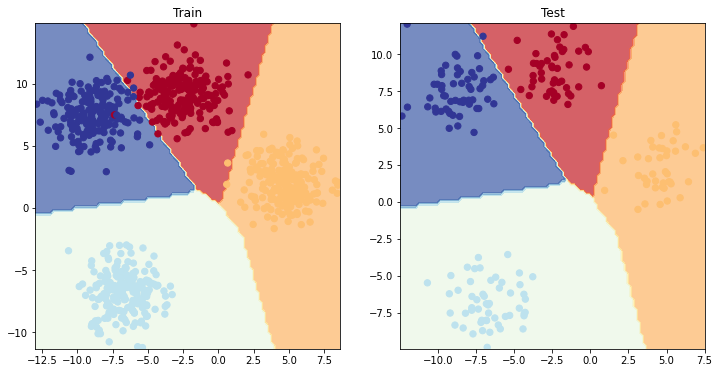

In [54]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

##9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate you classification model using more metrics such as the following:

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th><strong>Metric name/Evaluation method</strong></th>
<th><strong>Defintion</strong></th>
<th><strong>Code</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>Accuracy</td>
<td>Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.</td>
<td><a href="https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3"><code>torchmetrics.Accuracy()</code></a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>sklearn.metrics.accuracy_score()</code></a></td>
</tr>
<tr>
<td>Precision</td>
<td>Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).</td>
<td><a href="https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4"><code>torchmetrics.Precision()</code></a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html"><code>sklearn.metrics.precision_score()</code></a></td>
</tr>
<tr>
<td>Recall</td>
<td>Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.</td>
<td><a href="https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5"><code>torchmetrics.Recall()</code></a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html"><code>sklearn.metrics.recall_score()</code></a></td>
</tr>
<tr>
<td>F1-score</td>
<td>Combines precision and recall into one metric. 1 is best, 0 is worst.</td>
<td><a href="https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score"><code>torchmetrics.F1Score()</code></a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html"><code>sklearn.metrics.f1_score()</code></a></td>
</tr>
<tr>
<td><a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">Confusion matrix</a></td>
<td>Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).</td>
<td><a href="https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix"><code>torchmetrics.ConfusionMatrix</code></a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions"><code>sklearn.metrics.plot_confusion_matrix()</code></a></td>
</tr>
<tr>
<td>Classification report</td>
<td>Collection of some of the main classification metrics such as precision, recall and f1-score.</td>
<td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>sklearn.metrics.classification_report()</code></a></td>
</tr>
</tbody>
</table></div></div>